## 수행목표
KMRD 데이터셋을 다운로드하고 각 파일 스키마를 확인한다.

## 수행단계

### KMRD

- [KMRD 데이터 다운로드](https://github.com/lovit/kmrd)
	- 위 github 경로에서 데이터를 확인하고 다운로드 한다.
	- kmr_dataset/datafile/kmrd-small 폴더에 필요한 데이터가 있다.

- KMRD 데이터 준비 및 로딩
	- 각 파일에는 어떤 데이터가 저장되어 있고 어떤 데이터 필드로 구성되어 있는지 파악하라.
	- Pandas를 이용해서 데이터를 로딩해서 데이터를 확인하라.

- 기본 통계 확인
	- 사용자 수, 영화 수, 평점 수, 제작국가 수, 출연진 수, 장르 개수 등의 기본 통계를 확인하라.

In [263]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.family'] = 'D2coding'
plt.rcParams['font.size'] = 9
plt.rcParams['axes.unicode_minus'] = False

from kmr_dataset import load_rates, get_paths

In [264]:
# movie

path = get_paths(size='small')[3]
df_movies = pd.read_csv(path, sep='\t').dropna()
df_movies['year'] = df_movies['year'].astype('int')

df_movies.head(15)

,movie,title,title_eng,year,grade
0,10001,시네마 천국,"Cinema Paradiso , 1988",2013,전체 관람가
1,10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015,12세 관람가
2,10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015,12세 관람가
3,10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990,전체 관람가
4,10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997,PG
5,10006,스타워즈 에피소드 5 - 제국의 역습,"Star Wars Episode V: The Empire Strikes Back ,...",1997,PG
6,10007,스타워즈 에피소드 6 - 제다이의 귀환,"Star Wars: Episode VI: Return Of The Jedi , 1983",1997,PG
7,10008,슈퍼맨,"Superman , 1978",1979,PG
8,10009,슈퍼맨 2,"Superman II , 1980",1981,PG
10,10011,슈퍼맨 4 - 최강의 적,"Superman IV: The Quest For Peace , 1987",1990,전체 관람가


<Axes: xlabel='year'>

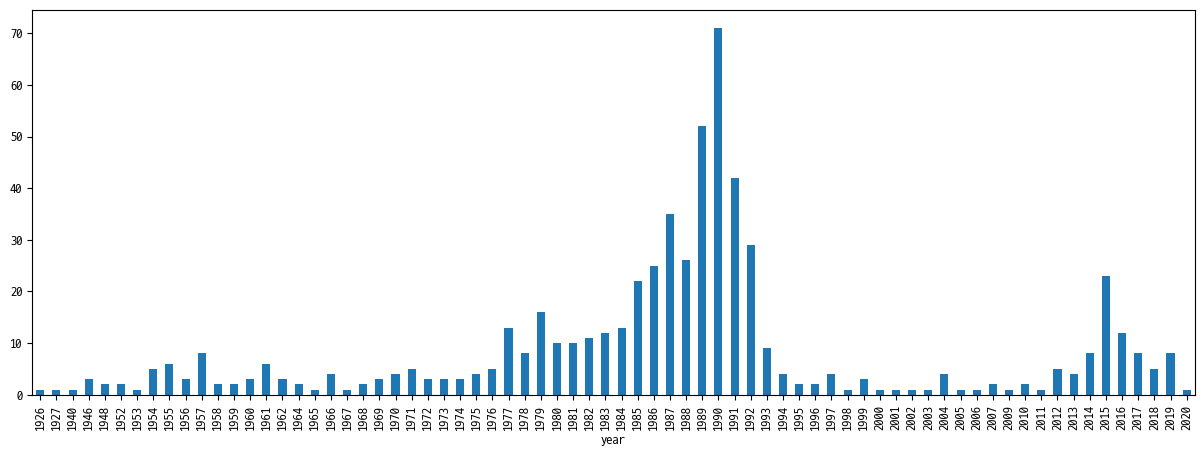

In [265]:

df_year = df_movies.groupby('year').size()
df_year.plot(kind='bar', figsize=(15, 5))

In [266]:
# genres

path = get_paths(size='small')[2]
df_genres = pd.read_csv(path, sep=',').dropna()
df_groupedGenres = df_genres.groupby(['movie']).agg({'genre': ', '.join}).reset_index()

df_groupedGenres.head(15)

,movie,genre
0,10001,"드라마, 멜로/로맨스"
1,10002,"SF, 코미디"
2,10003,"SF, 코미디"
3,10004,"서부, SF, 판타지, 코미디"
4,10005,"판타지, 모험, SF, 액션"
5,10006,"판타지, 모험, SF, 액션"
6,10007,"판타지, SF, 액션, 모험"
7,10008,"SF, 액션, 모험, 가족"
8,10009,"판타지, SF, 액션, 모험"
9,10010,"액션, 코미디, 판타지, SF, 모험"


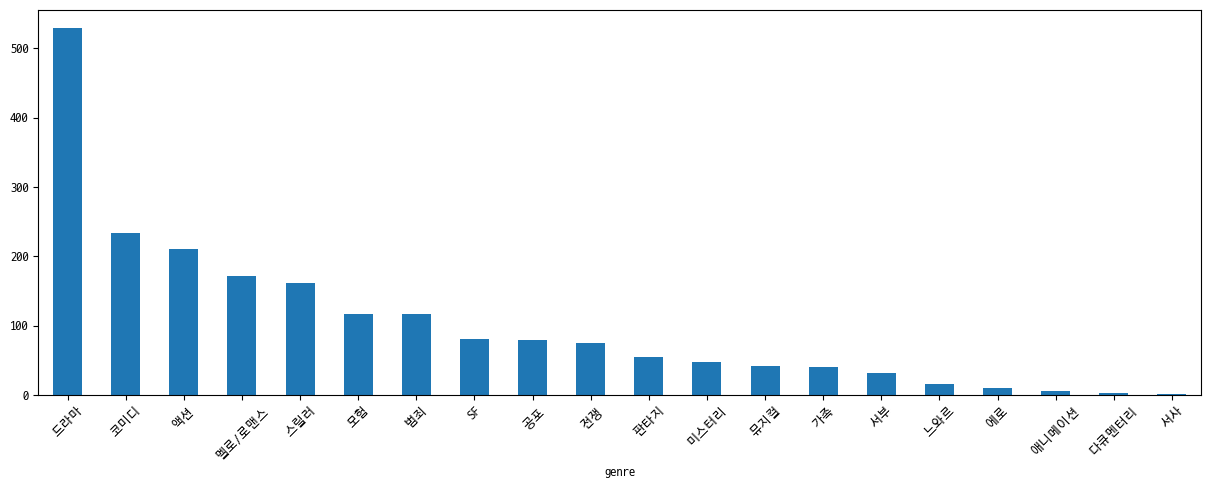

In [284]:
df_genreGroup = df_genres.groupby('genre').size().sort_values(ascending=False)
df_genreGroup.plot(kind='bar', figsize=(15, 5))
plt.xticks(rotation=45)
plt.show()

In [268]:
# rates

path = get_paths(size='small')[5]
df_rates = pd.read_csv(path, sep=',').dropna()

df_rates.head(15)

,user,movie,rate,time
0,0,10003,7,1494128040
1,0,10004,7,1467529800
2,0,10018,9,1513344120
3,0,10021,9,1424497980
4,0,10022,7,1427627340
5,0,10023,7,1428738480
6,0,10024,4,1429359420
7,0,10025,4,1433590980
8,0,10028,10,1425108480
9,0,10029,9,1513602720


In [269]:
df_userRate = df_rates.groupby(['user']).agg({'rate': 'mean', 'movie': 'count'}).reset_index()
df_userRate.head(15)

,user,rate,movie
0,0,7.388235,85
1,1,9.000000,1
2,2,7.733333,15
3,3,7.413043,92
4,4,6.760563,71
5,5,10.000000,1
6,6,10.000000,5
7,7,9.200000,5
8,8,9.153846,13
9,9,10.000000,22


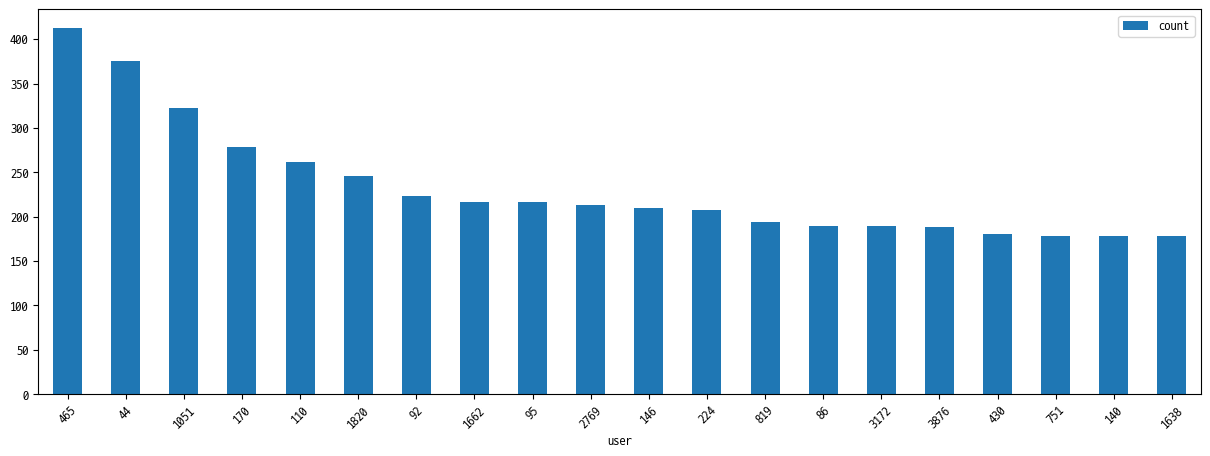

In [270]:
df_rateMost = df_rates.groupby('user').size().sort_values(ascending=False)
df_rateMost = pd.DataFrame(df_rateMost).reset_index()
df_rateMost.rename(columns={df_rateMost.columns[1]: 'count'}, inplace=True)
df_rateMost.head(20).plot(x='user', y='count', kind='bar', figsize=(15, 5))
plt.xticks(rotation=45)
plt.show()

In [271]:
df_movieRate = df_rates.groupby(['movie']).agg({'rate': 'mean', 'user': 'count'}).reset_index()
df_movieRate.head(15)

,movie,rate,user
0,10001,9.294360,3635
1,10002,9.416778,3004
2,10003,9.270981,989
3,10004,9.120000,700
4,10005,9.048619,905
5,10006,9.115127,747
6,10007,9.034335,699
7,10008,8.805785,242
8,10009,8.462185,119
9,10011,5.250000,76


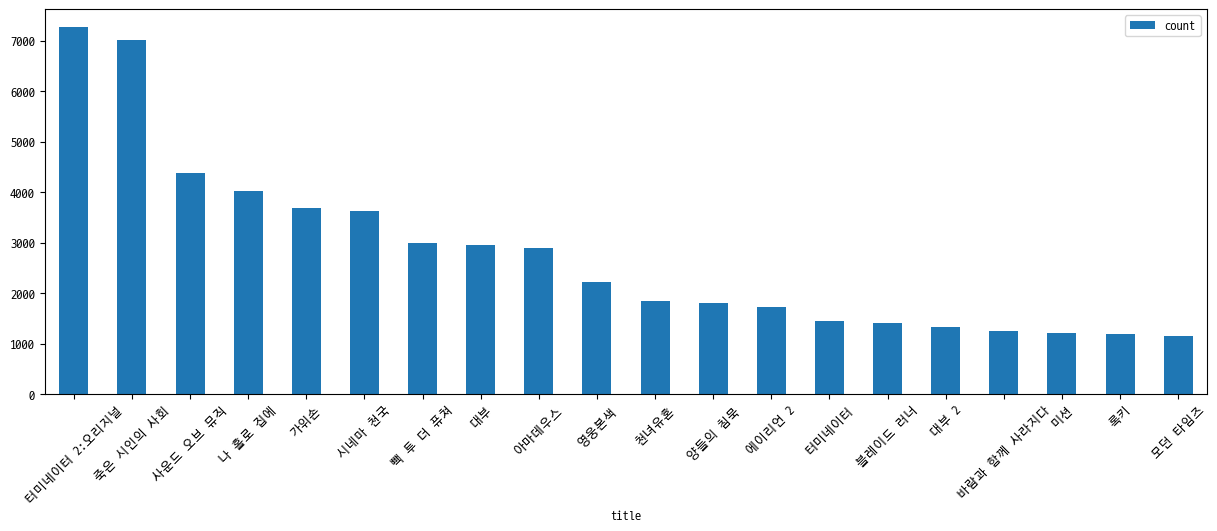

In [272]:
df_rateMost = df_rates.groupby('movie').size().sort_values(ascending=False)
df_rateMost = pd.DataFrame(df_rateMost).reset_index()
df_rateMost.rename(columns={df_rateMost.columns[1]: 'count'}, inplace=True)
df_rateMost = pd.merge(df_rateMost, df_movies[['movie', 'title']], on=['movie'], how='inner')
df_rateMost.head(20).plot(x='title', y='count', kind='bar', figsize=(15, 5))
plt.xticks(rotation=45)
plt.show()

In [273]:
# countries

path = get_paths(size='small')[1]
df_countries = pd.read_csv(path, sep=',').dropna()

df_countries.head(15)

,movie,country
0,10001,이탈리아
1,10001,프랑스
2,10002,미국
3,10003,미국
4,10004,미국
5,10005,미국
6,10006,미국
7,10007,미국
8,10008,영국
9,10009,영국


In [274]:
df_mergedCountry = df_countries.groupby(['movie']).agg({'country': ', '.join}).reset_index()
df_mergedCountry.head(15)

,movie,country
0,10001,"이탈리아, 프랑스"
1,10002,미국
2,10003,미국
3,10004,미국
4,10005,미국
5,10006,미국
6,10007,미국
7,10008,영국
8,10009,영국
9,10010,영국


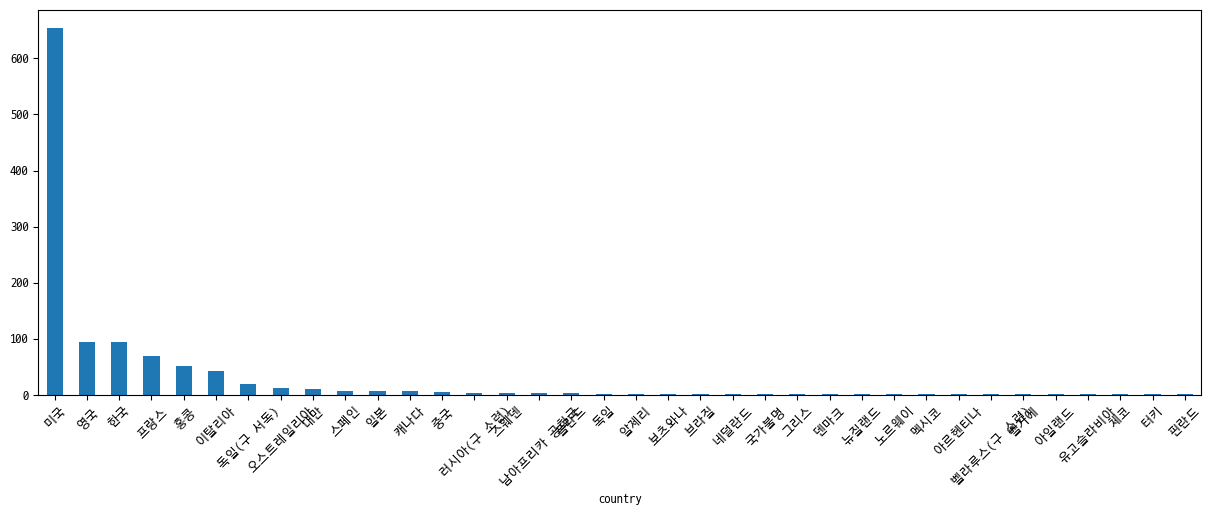

In [275]:
tmp = df_countries.groupby('country').size().sort_values(ascending=False)
tmp.plot(kind='bar', figsize=(15, 5))
plt.xticks(rotation=45)
plt.show()

In [276]:
# castings & people

path = get_paths(size='small')[0]
df_castings = pd.read_csv(path, sep=',').dropna()

df_castings.head(15)

,movie,people,order,leading
0,10001,4374,1,1
1,10001,178,2,1
2,10001,3241,3,1
3,10001,47952,4,1
4,10001,47953,5,0
5,10001,19538,6,0
6,10001,18991,7,0
7,10001,47954,8,0
8,10001,6038,9,0
9,10001,24102,10,0


In [277]:
path = get_paths(size='small')[4]
df_people = pd.read_csv(path, sep='\t').dropna()

df_people.head(15)

,people,korean,original
0,5,아담 볼드윈,Adam Baldwin
1,8,애드리안 라인,Adrian Lyne
2,9,에이단 퀸,Aidan Quinn
3,13,구로사와 아키라,Akira Kurosawa
4,15,알 파치노,Al Pacino
5,24,알랭 들롱,Alain Delon
6,27,앨런 베이츠,Alan Bates
7,28,알란 파커,Alan Parker
8,29,앨런 릭먼,Alan Rickman
9,34,알렉 볼드윈,Alec Baldwin


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   people      5839 non-null   int64 
 1   num_movies  5839 non-null   int64 
 2   korean      5839 non-null   object
dtypes: int64(2), object(1)
memory usage: 137.0+ KB


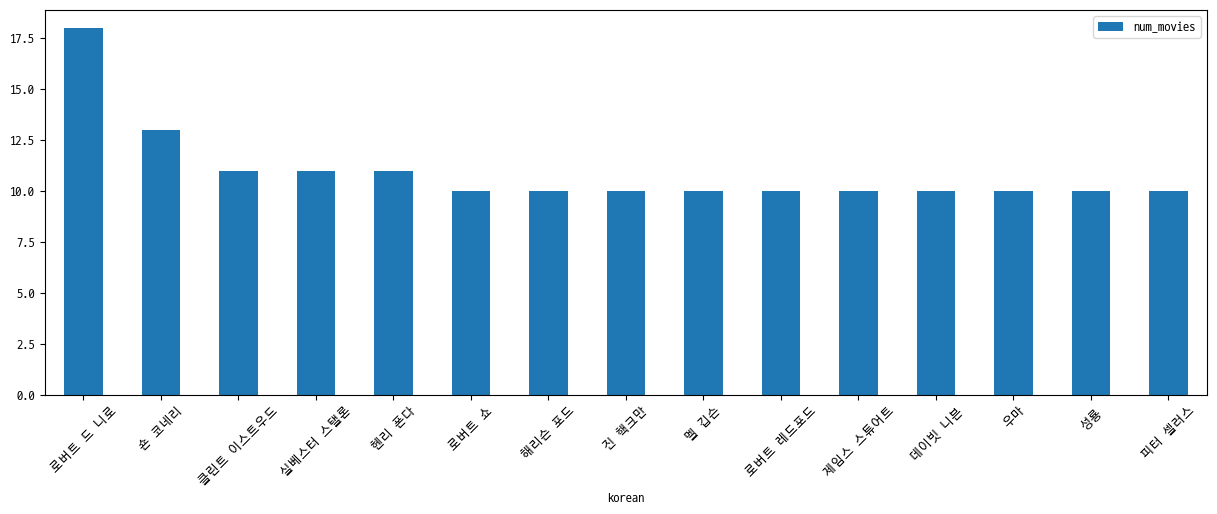

In [289]:
df_people_count = (
    df_castings.groupby('people')['movie']
      .nunique()      
      .reset_index(name='num_movies')
      .sort_values(by='num_movies', ascending=False)
)

df_people_count = pd.merge(df_people_count, df_people[['people', 'korean']], on=['people'], how='inner')
df_people_count['num_movies'] = df_people_count['num_movies'].astype(int)

df_people_count.head(15).plot(x='korean', y='num_movies', kind='bar', figsize=(15, 5))
plt.xticks(rotation=45)
plt.show()

In [279]:
df_merged = pd.merge(df_castings, df_people, on=['people'], how='inner')

result = df_merged.groupby('movie').agg(
    주연=('korean', lambda x: ', '.join(x[df_merged.loc[x.index, 'leading'] == 1])),
    조연=('korean', lambda x: ', '.join(x[df_merged.loc[x.index, 'leading'] == 0]))
).reset_index()

result.head(15)

,movie,주연,조연
0,10001,"자끄 페렝, 브리지트 포시, 필립 느와레, 살바토레 카스치오","안토넬라 아틸리, 엔조 카나발, 아이사 다니엘리, 레오 굴로타, 마르코 레오나르디,..."
1,10002,"마이클 J. 폭스, 크리스토퍼 로이드, 리 톰슨, 크리스핀 글로버, 토머스 F. 윌슨","클로디아 웰즈, 마크 맥클루어, 웬디 조 스페버"
2,10003,"마이클 J. 폭스, 크리스토퍼 로이드","리 톰슨, 토머스 F. 윌슨, 엘리자베스 슈, 제프리 웨이스먼, 제임스 톨칸, 케이..."
3,10004,"마이클 J. 폭스, 크리스토퍼 로이드, 메리 스틴버겐, 토머스 F. 윌슨","맷 클라크, 리차드 다이사트, 팻 버트램, 해리 커리 쥬니어, 더브 테일러, 제임스..."
4,10005,"마크 해밀, 해리슨 포드, 캐리 피셔","피터 커싱, 알렉 기네스"
5,10006,"마크 해밀, 해리슨 포드, 캐리 피셔","빌리 디 윌리엄스, 안소니 다니엘스"
6,10007,"마크 해밀, 해리슨 포드, 캐리 피셔","빌리 디 윌리엄스, 안소니 다니엘스"
7,10008,"말론 브란도, 진 핵크만, 크리스토퍼 리브, 마곳 키더","네드 비티, 재키 쿠퍼, 글렌 포드, 트레버 하워드, 잭 오할로런, 발레리 페린, ..."
8,10009,"진 핵크만, 크리스토퍼 리브","네드 비티, 재키 쿠퍼, 사라 더글러스, 마곳 키더, 잭 오할로런, 발레리 페린, ..."
9,10010,"크리스토퍼 리브, 리차드 프라이어","재키 쿠퍼, 마크 맥클루어, 아네트 오툴, 애니 로스, 파멜라 스테펜슨, 로버트 본..."


In [280]:
print(f'영화 개수: {len(df_movies)}')
print(f'사용자 수: {len(set(df_rates['user']))}')
print(f'평가 수: {len(df_rates)}')
print(f'제작 국가 수: {len(set(df_countries['country']))}')
print(f'장르 개수: {len(set(df_genres["genre"]))}')
print(f'배우 수: {len(set(df_people["people"]))}')

영화 개수: 599
사용자 수: 52028
평가 수: 140710
제작 국가 수: 36
장르 개수: 20
배우 수: 6305
